In [37]:
import datetime

import matplotlib as mat

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools

import shutil

from salishsea_tools import viz_tools

from mpl_toolkits.axes_grid1 import make_axes_locatable


from matplotlib.backends.backend_agg import FigureCanvasAgg as fc



%matplotlib inline

plots = ("AUG 2",)

COL = 1

directory = "/home/gsgarbi/analysis-giorgio/project2/"

initial_depths = "45, 59, 77"

length = "2 weeks" #multiply trajectory length by ...

#reference: 14 days

ratio = 1

size = 40

fontsize = 40

mat.rcParams.update({'font.size': fontsize})

tfs = 36 #title font














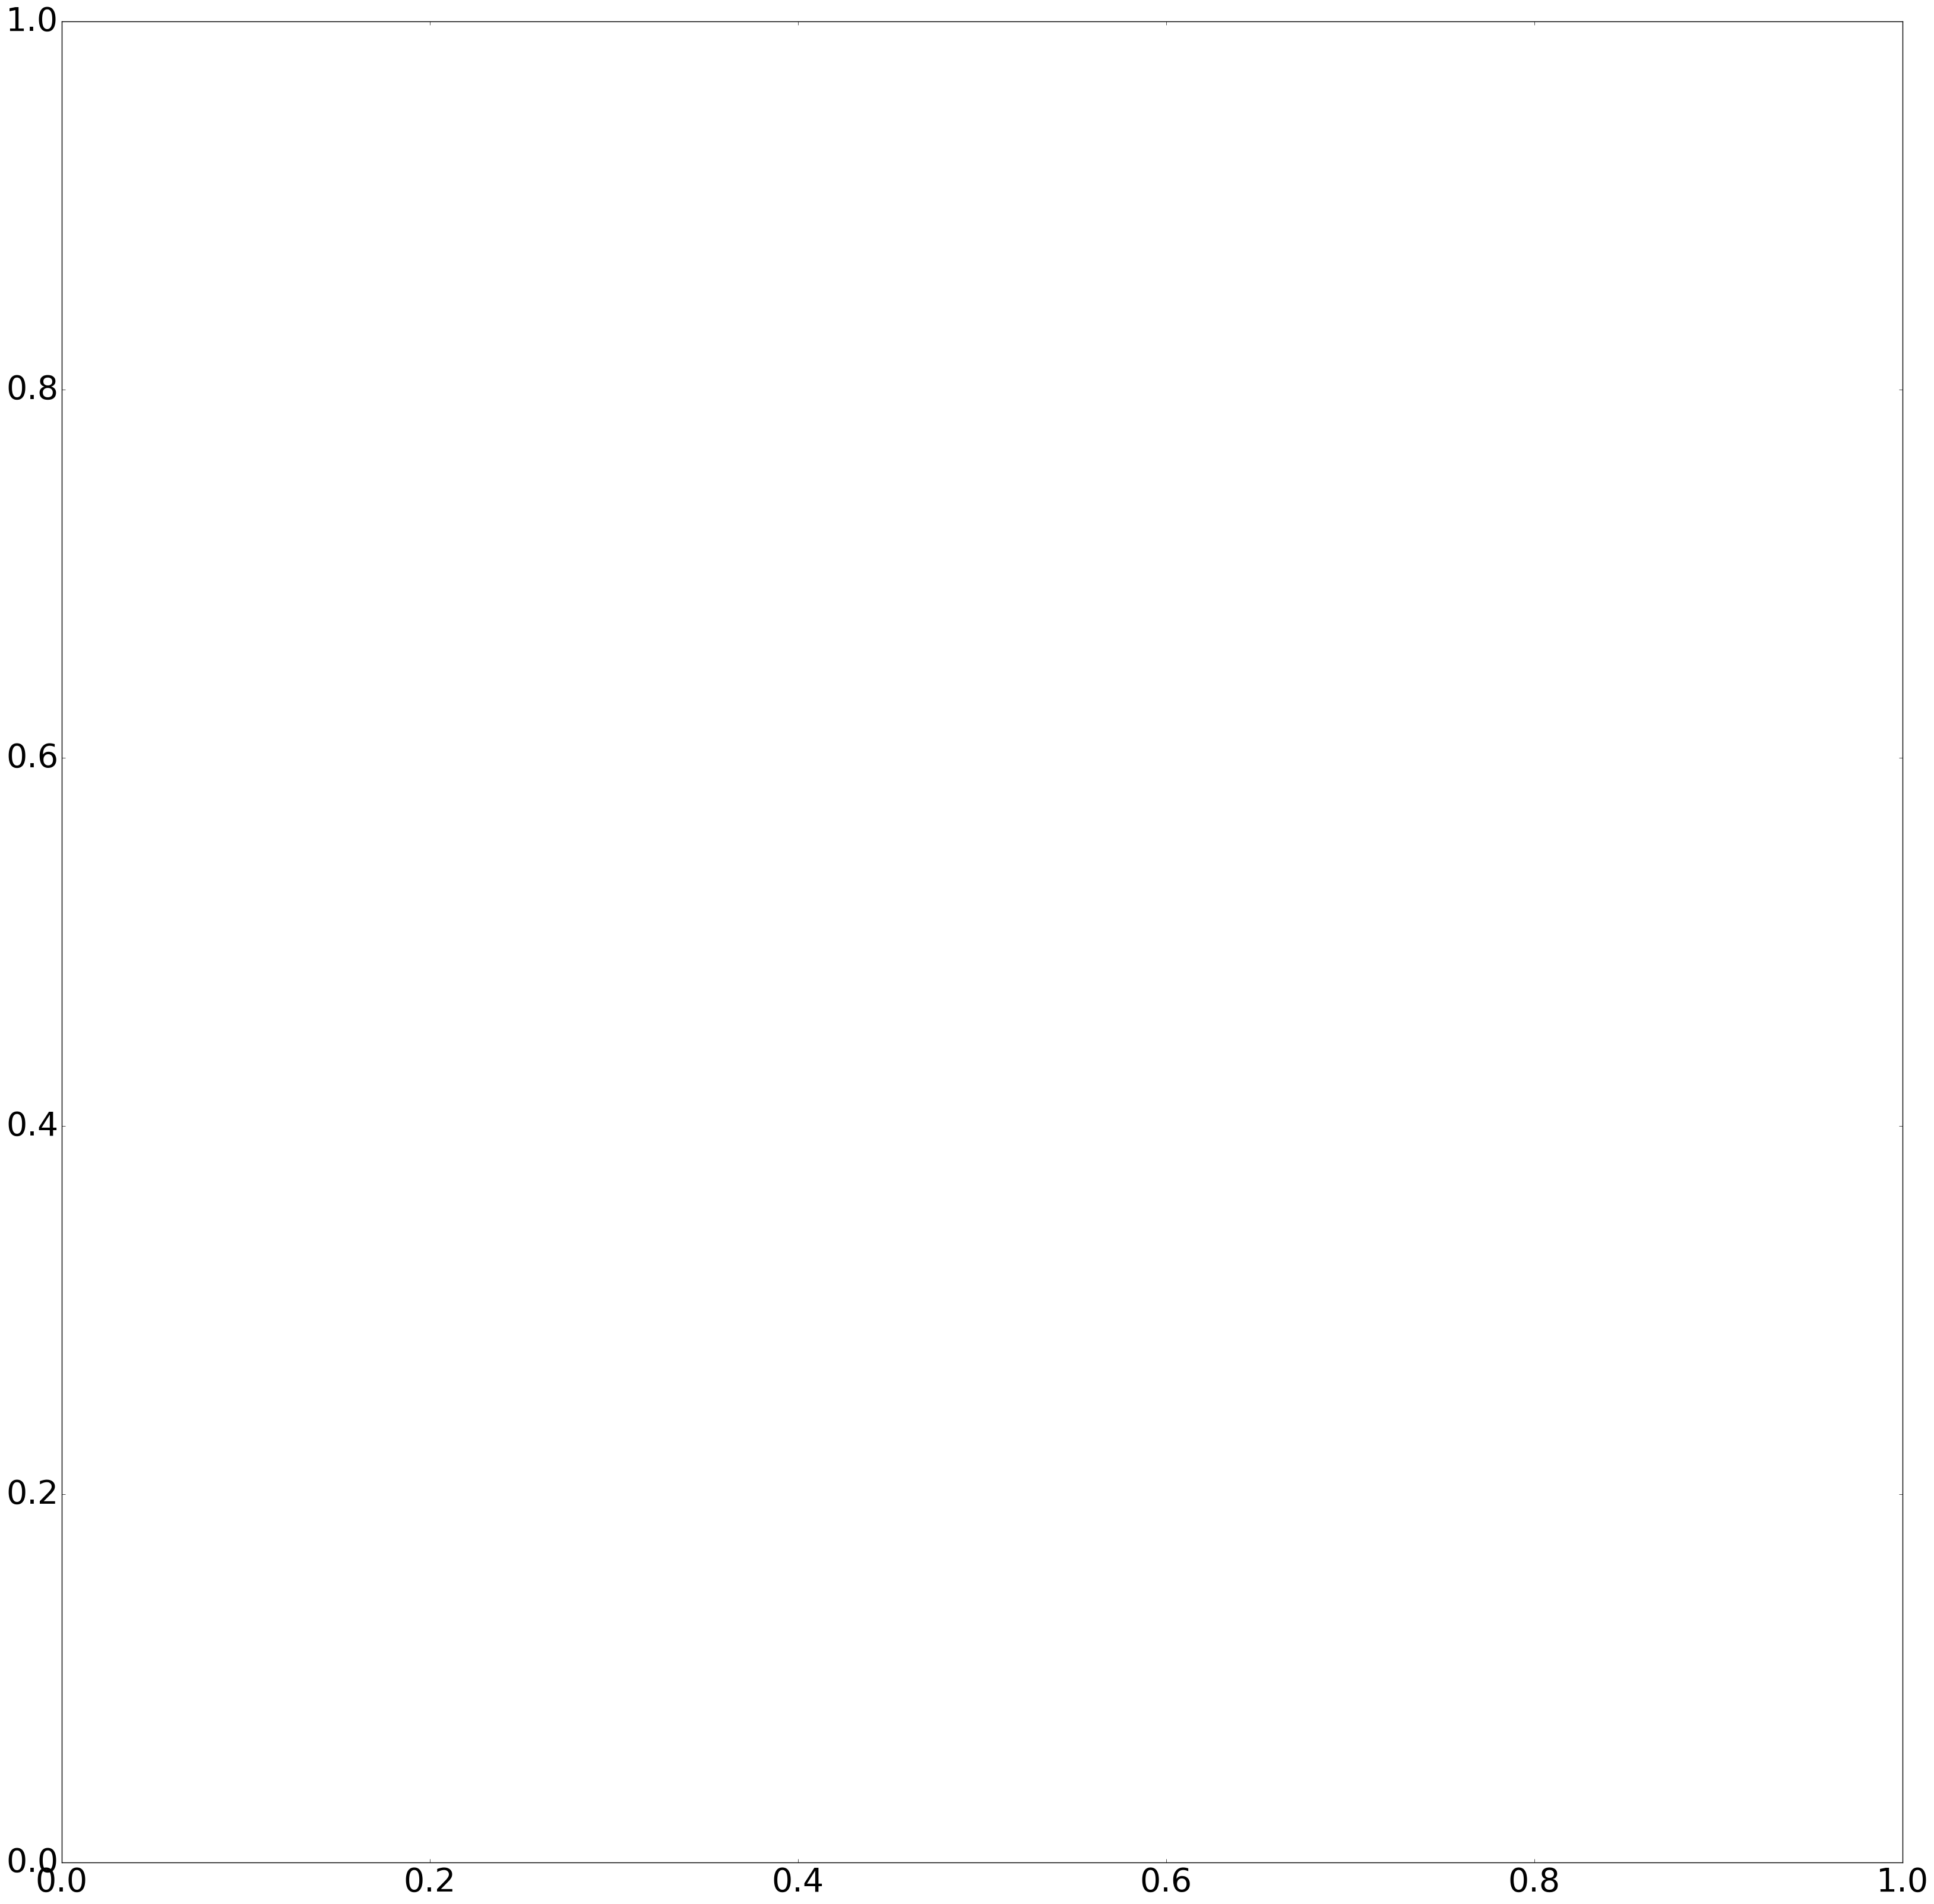

In [38]:
# fig mesh structure/constants

nplots = len(plots)

LIN = nplots // 2 + nplots % 2


fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

canvas = fc(fig)

#         Station 15: Lat = 49.130412, Lon = -123.3114
#         Station 16: Lat = 49.1214, Lon = -123.317415

S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)




bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/bathy_meter_SalishSea2.nc")
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]



#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
#print(y, x)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1

deep = 110
shallow = 35

new_limx = (-124.5,-122.5)

new_limy = (48.7,49.5)



original_limx = (-123.5, -123.1)

original_ticksx = (-123.5, -123.3, -123.1)

original_limy = (49.05, 49.35)

original_ticksy = (49.1, 49.2, 49.3)

new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])

new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                   



#norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
norm_p = None
cmap_p = plt.cm.plasma_r

norm_w = None
cmap_w = "winter_r"

norm_t = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cmap_t = plt.cm.plasma_r


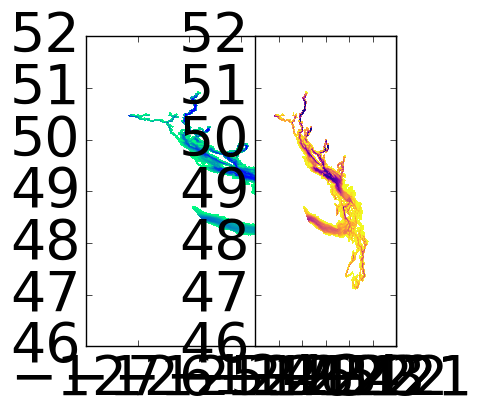

In [39]:

meshes = plt.figure(figsize=(4,4))

ax_w = meshes.add_subplot(111)

ax_p = meshes.add_subplot(122)

ax_t = meshes.add_subplot(122)




mesh_w = ax_w.pcolormesh(model_lons, model_lats, depth, cmap=cmap_w, norm = norm_w)
        
mesh_p = ax_p.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

mesh_t = ax_t.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

In [44]:
# what to plot, how many plots, how many particles, for how long?
# how many columns?
# create trajectories[], create axes parameters

LIN = nplots // 2 + nplots % 2

trajectories = []

initial_positions = []


trajectories1 =[]
init1 = []
for num in range(1,nplots+1):
    trajectories1.append(np.loadtxt(directory+"run%s/traj.txt"%num, delimiter = ' '))
    init1.append(np.loadtxt(directory+"run%s/initial_positions.txt"%num))

l = 0
c= COL
for lin in range(LIN):
    trajectories.append(trajectories1[l:c])
    initial_positions.append(init1[l:c])
    l += 2
    c += 2

    
PARTICLES = (4,7,10)

titles = []

for j in range(LIN):
    for k in range (COL):
        initial_times = []
        pos = COL*j+k

        
        for i in initial_positions[j][k]:
            initial_times.append(int(i[3]))
            
        
        first_time = initial_times[0]
        
        last_time = initial_times[-1]
        first_day = plots[pos]
        
        title = "INITIAL DATE: %s; " %plots[pos] + "INITIAL TIMES (24h format): %s - %s"%(first_time, last_time) + "\n" + "RUN LENGTH: %s; INITIAL DEPTHS(m): %s" %(length, initial_depths)
    
        titles.append(title) 

for x in titles:
    print (x+'/n')
            

print (axs)

#results: PARTCLES, title                       

INITIAL DATE: AUG 2; INITIAL TIMES (24h format): 1 - 12
RUN LENGTH: 2 weeks; INITIAL DEPTHS(m): 45, 59, 77/n
Axes(0.125,0.125;0.775x0.775)


In [35]:
# fig = plt.figure(figsize = (size, size))


# top = 0.95

# vert = 0.07

# rig = 0.1

# hei = 0.03

# wid = 1.5



# part = fig.add_axes((rig,top,wid,hei))
# norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
# cb1 = mpl_colorbar.ColorbarBase(part, cmap=cmap, norm=norm,  orientation = "horizontal")
# cb1.set_label('Particle Depth (m)', fontsize = 50)

# particlecb = fig

# fig = plt.figure(figsize = (size, size))

# water = fig.add_axes((rig,top,wid,hei))
# cb_mesh = fig.colorbar(mesh, water, orientation = "horizontal" )
# cb_mesh.set_label("Water Depth (m)", fontsize = 50)

# watercb = fig

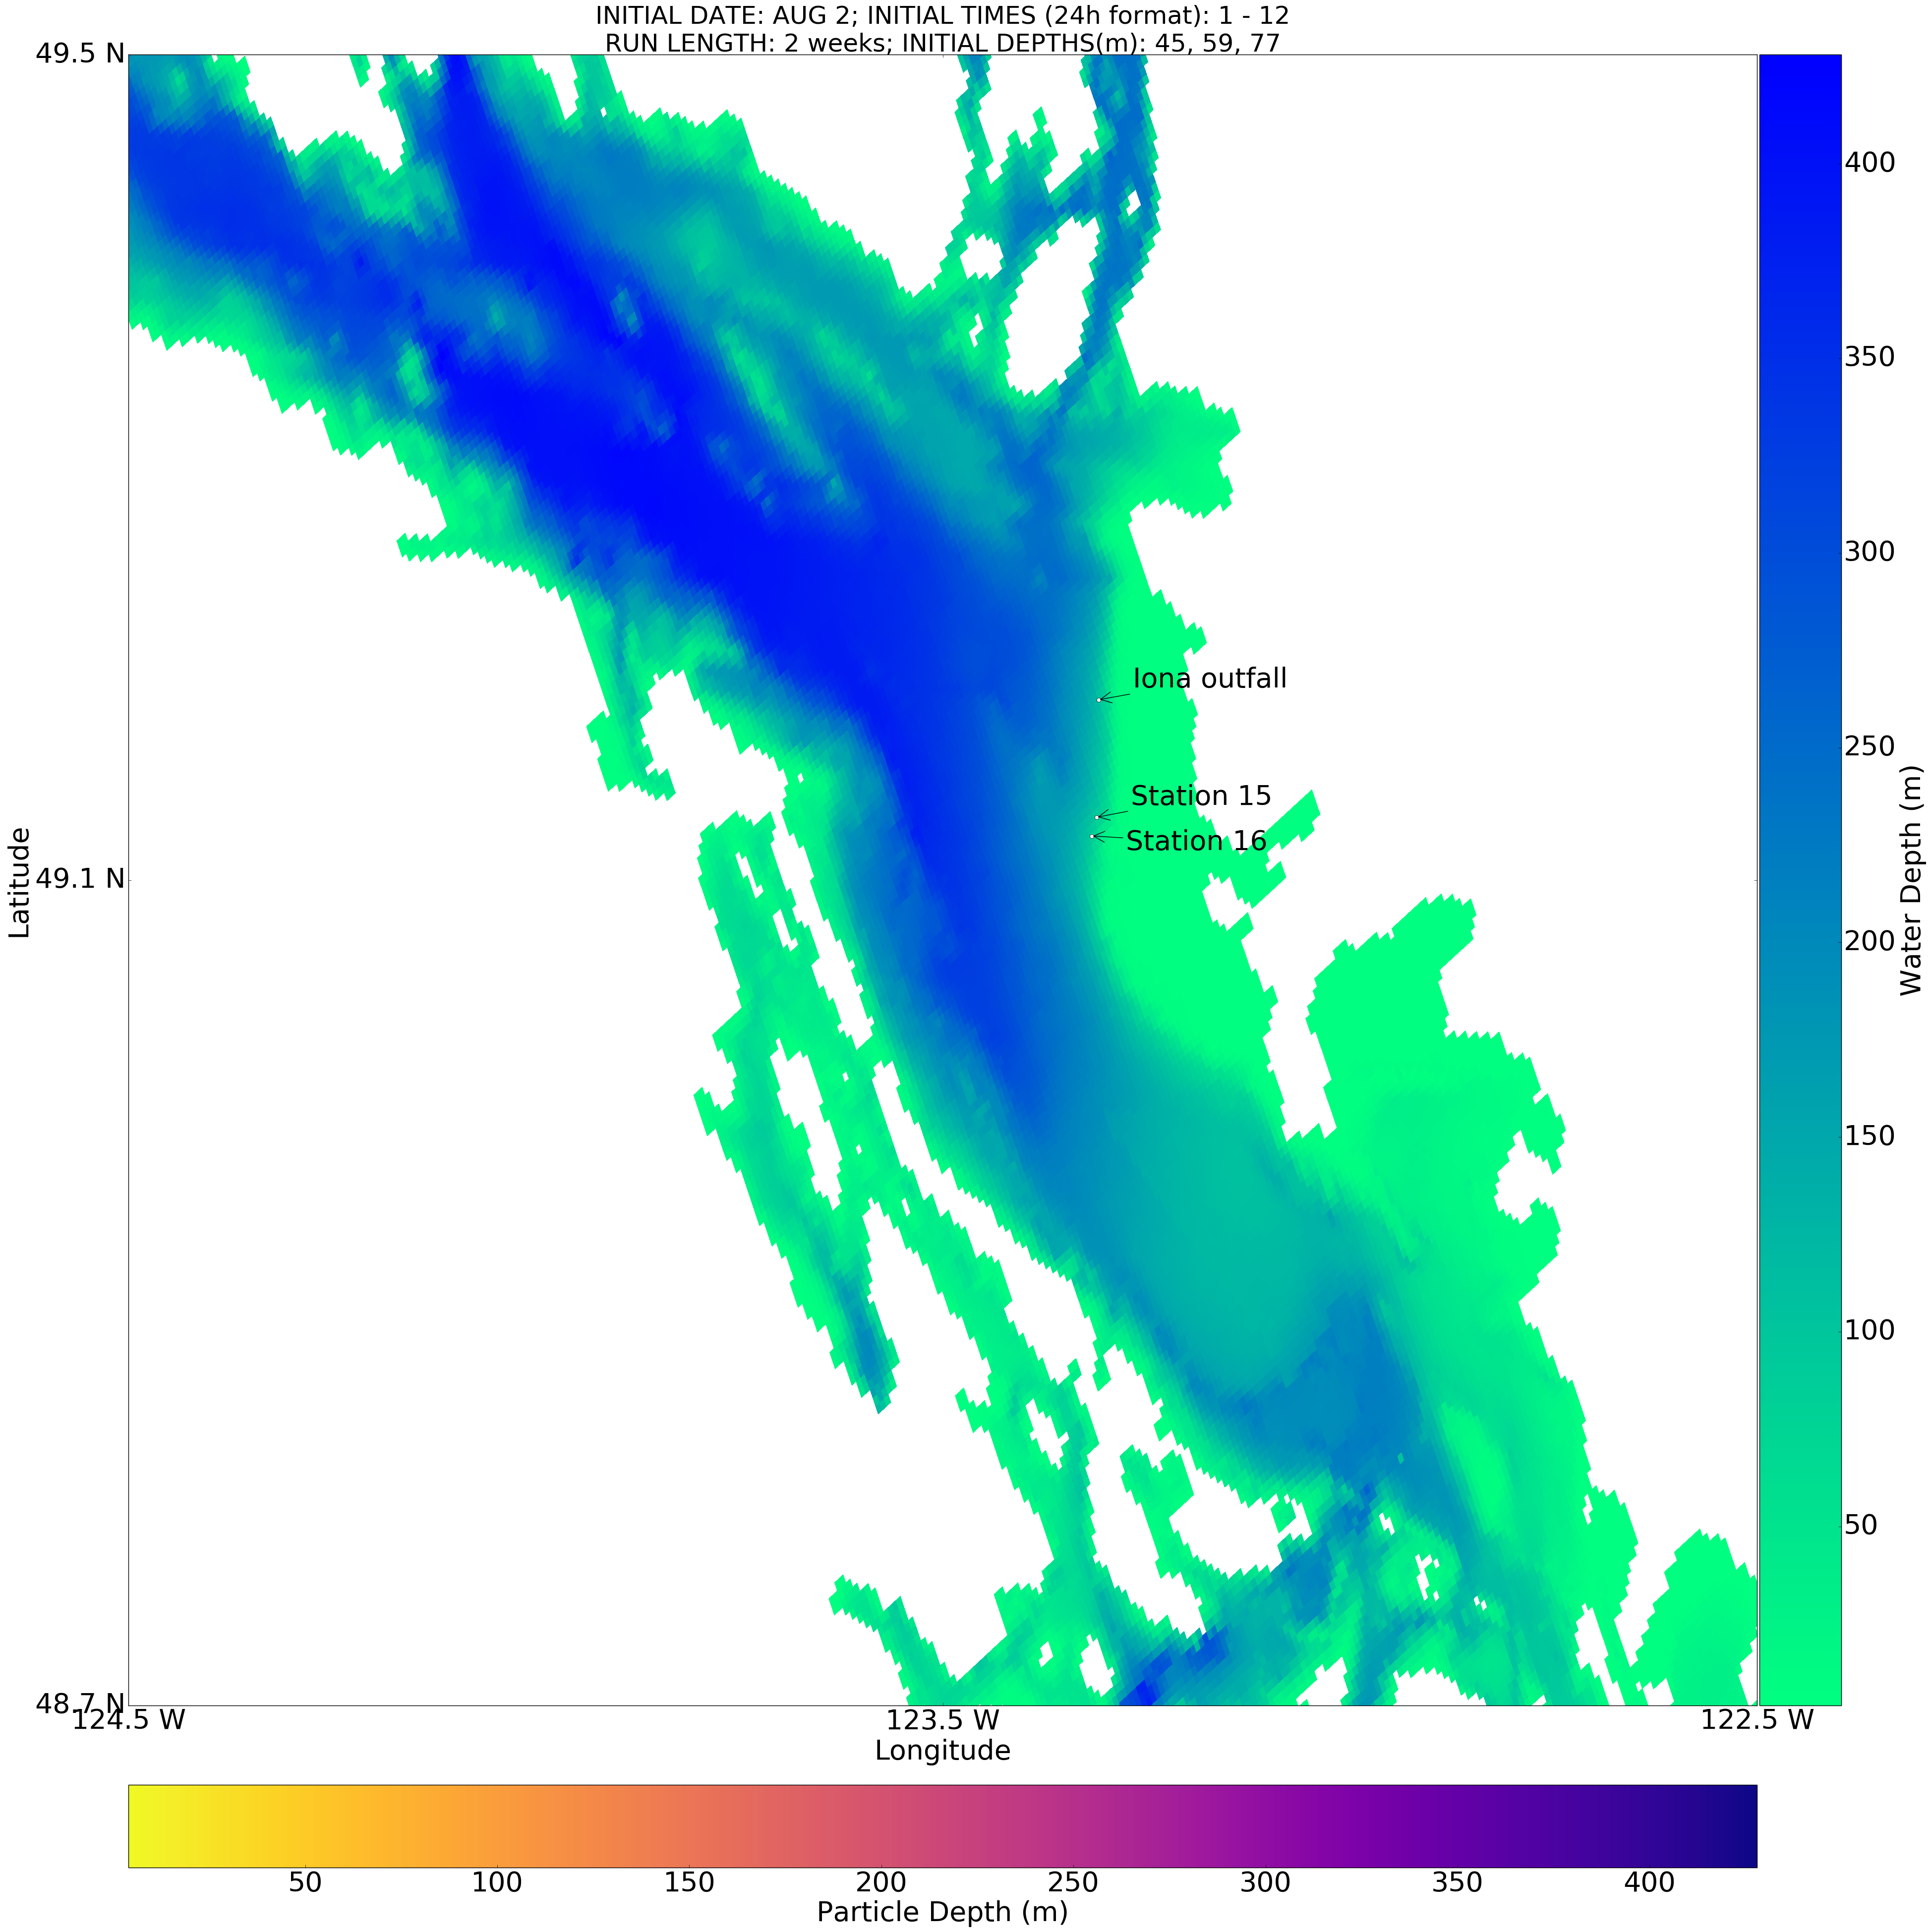

In [46]:
fig, axs = plt.subplots(LIN,COL, figsize = (size,size))


k == 0

j== 0



if j == 0:
    if k == 0:
        
        divider = make_axes_locatable(axs)
        
        cax_w = divider.append_axes("right", size="5%", pad=0.05)
        
        cax_p = divider.append_axes("bottom", size="5%", pad=1.6)
        
        
        cb_w = fig.colorbar(mesh_w, cax = cax_w)
        
        cb_p = fig.colorbar(mesh_p, cax = cax_p, orientation = "horizontal")
        
        cb_w.set_label("Water Depth (m)")
        
        cb_p.set_label("Particle Depth (m)")




        mesh_w = axs.pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)


        
        

        pos = COL*j+k
        
        axs.set_title(titles[pos], fontsize = tfs)

        


        
#         if k == 0:
#             norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
#             cb1 = fig.colorbar(mesh2, ax = axs, cmap=plt.cm.plasma_r, norm=norm, pad = pad)
#             cb1.set_label('Particle Depth (m)')
        

#         if k == 1:
#             cb_mesh = fig.colorbar(mesh, ax=axs, pad = pad)
#             cb_mesh.set_label("Water Depth (m)")

            
        
        

        

        axs.set_xlim(new_limx)
        axs.set_xticks(new_ticksx)
        axs.set_xticklabels(('%s W' %-new_limx[0], '%s W' %-round(float(sum(new_limx))/2,2), '%s W' %-new_limx[1]))
        axs.set_xlabel('Longitude')
        
        axs.set_ylim(new_limy)
        axs.set_yticks(new_ticksy)
        axs.set_yticklabels(('%s N' %new_limy[0], '%s N' %round(float(sum(new_limy))/2,1), '%s N' %new_limy[1]))
        axs.set_ylabel('Latitude')
        
        
        #Iona
        axs.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
        #New Stations

        axs.plot(S15[0],S15[1], 'wo')
        
        axs.plot(S16[0],S16[1], 'wo')
        
        axs.annotate(
        "Iona outfall",
        xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        axs.annotate(
        "Station 15",
        xy=(S15[0],S15[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

        axs.annotate(
        "Station 16",
        xy=(S16[0],S16[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='top',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    


plt.tight_layout()



In [47]:
j = 1
k = 0
south = []
for i in range(len(trajectories[j][k])):
        if trajectories[j][k][i][2] < 49:
            #scaled_z = 1-(deep + trajectories[j][k][i][3]) / (end - start)
            #cmap = plt.cm.plasma_r
            #color = cmap(scaled_z)
            #axs.scatter(trajectories[j][k][i][1] , trajectories[j][k][i][2] , c=color, edgecolor = "none")
            if trajectories[j][k][i][0] not in south:
                south.append(trajectories[j][k][i][0])

for i in PARTICLES:
    if m in south:
        print ("%s is moving south" %i)
        
traj4 = []

for i in range(len(trajectories[j][k])):
    if trajectories[j][k][i][0] == 4:
        traj4.append(trajectories[j][k][i])
        
for t in range(len(traj4)):
    scaled_t = 1-(end - t)/ end
    cmap = plt.cm.plasma_r
    color = cmap(scaled_t)
    plt.scatter(traj4[t][1], traj4[t][2], c = color, edgecolor = "none")

IndexError: list index out of range

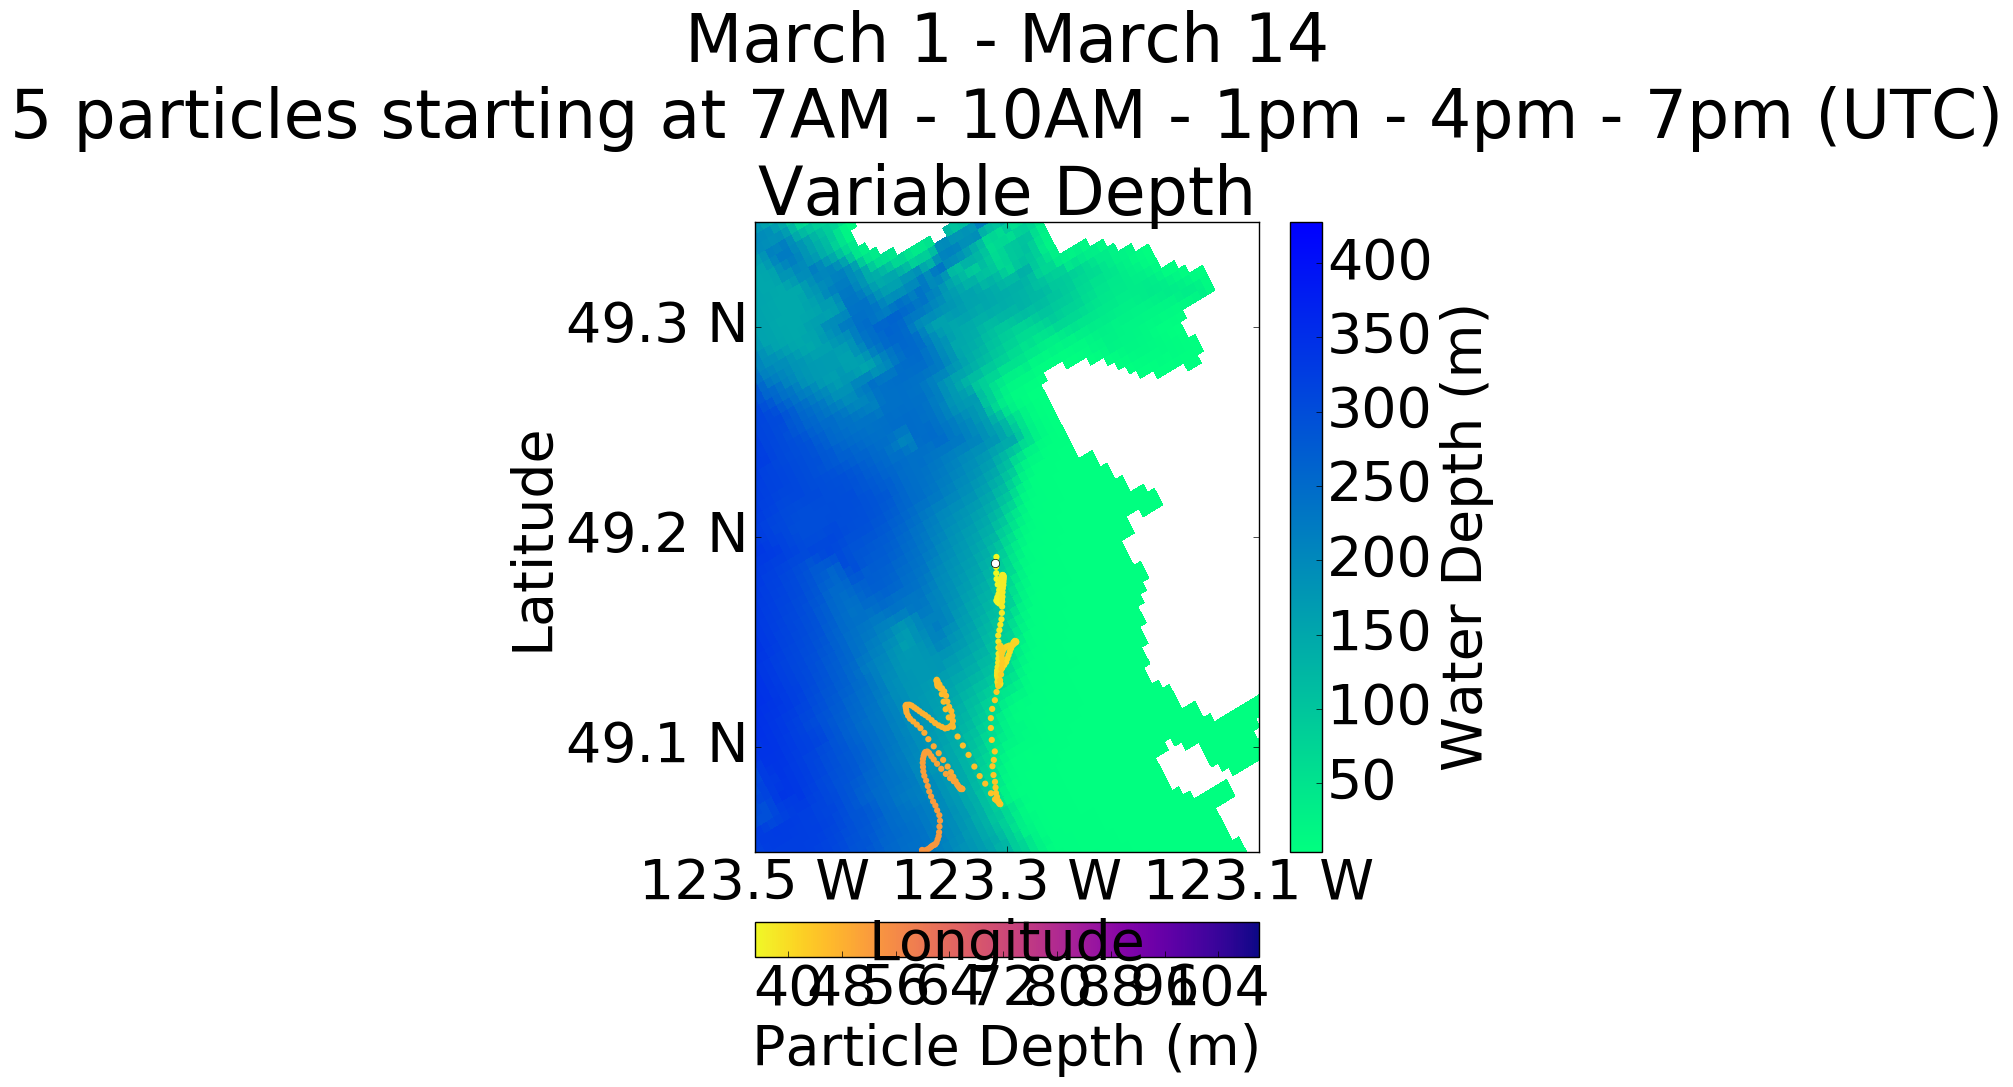

In [30]:
end = int(len(trajectories[0][0])/12)
start = 0

traj4 = []

for i in range(len(trajectories[j][k])):
    if trajectories[j][k][i][0] == 4:
        traj4.append(trajectories[j][k][i])





ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))

for t in range(len(traj4)):
    scaled_t = 1-(end - t)/ end
    cmap = plt.cm.plasma_r
    color = cmap(scaled_t)
    plt.scatter(traj4[t][1], traj4[t][2], c = color, edgecolor = "none")

norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')


        

# for m in south:
#     traj = trajectories[j][k][(m-1)*end:m*end]
#     if m == 4:
#         traj = list (traj)
#     if m == 7:
#         traj4 = (traj)
#     if m == 10:
#         traj10 = (traj)


        




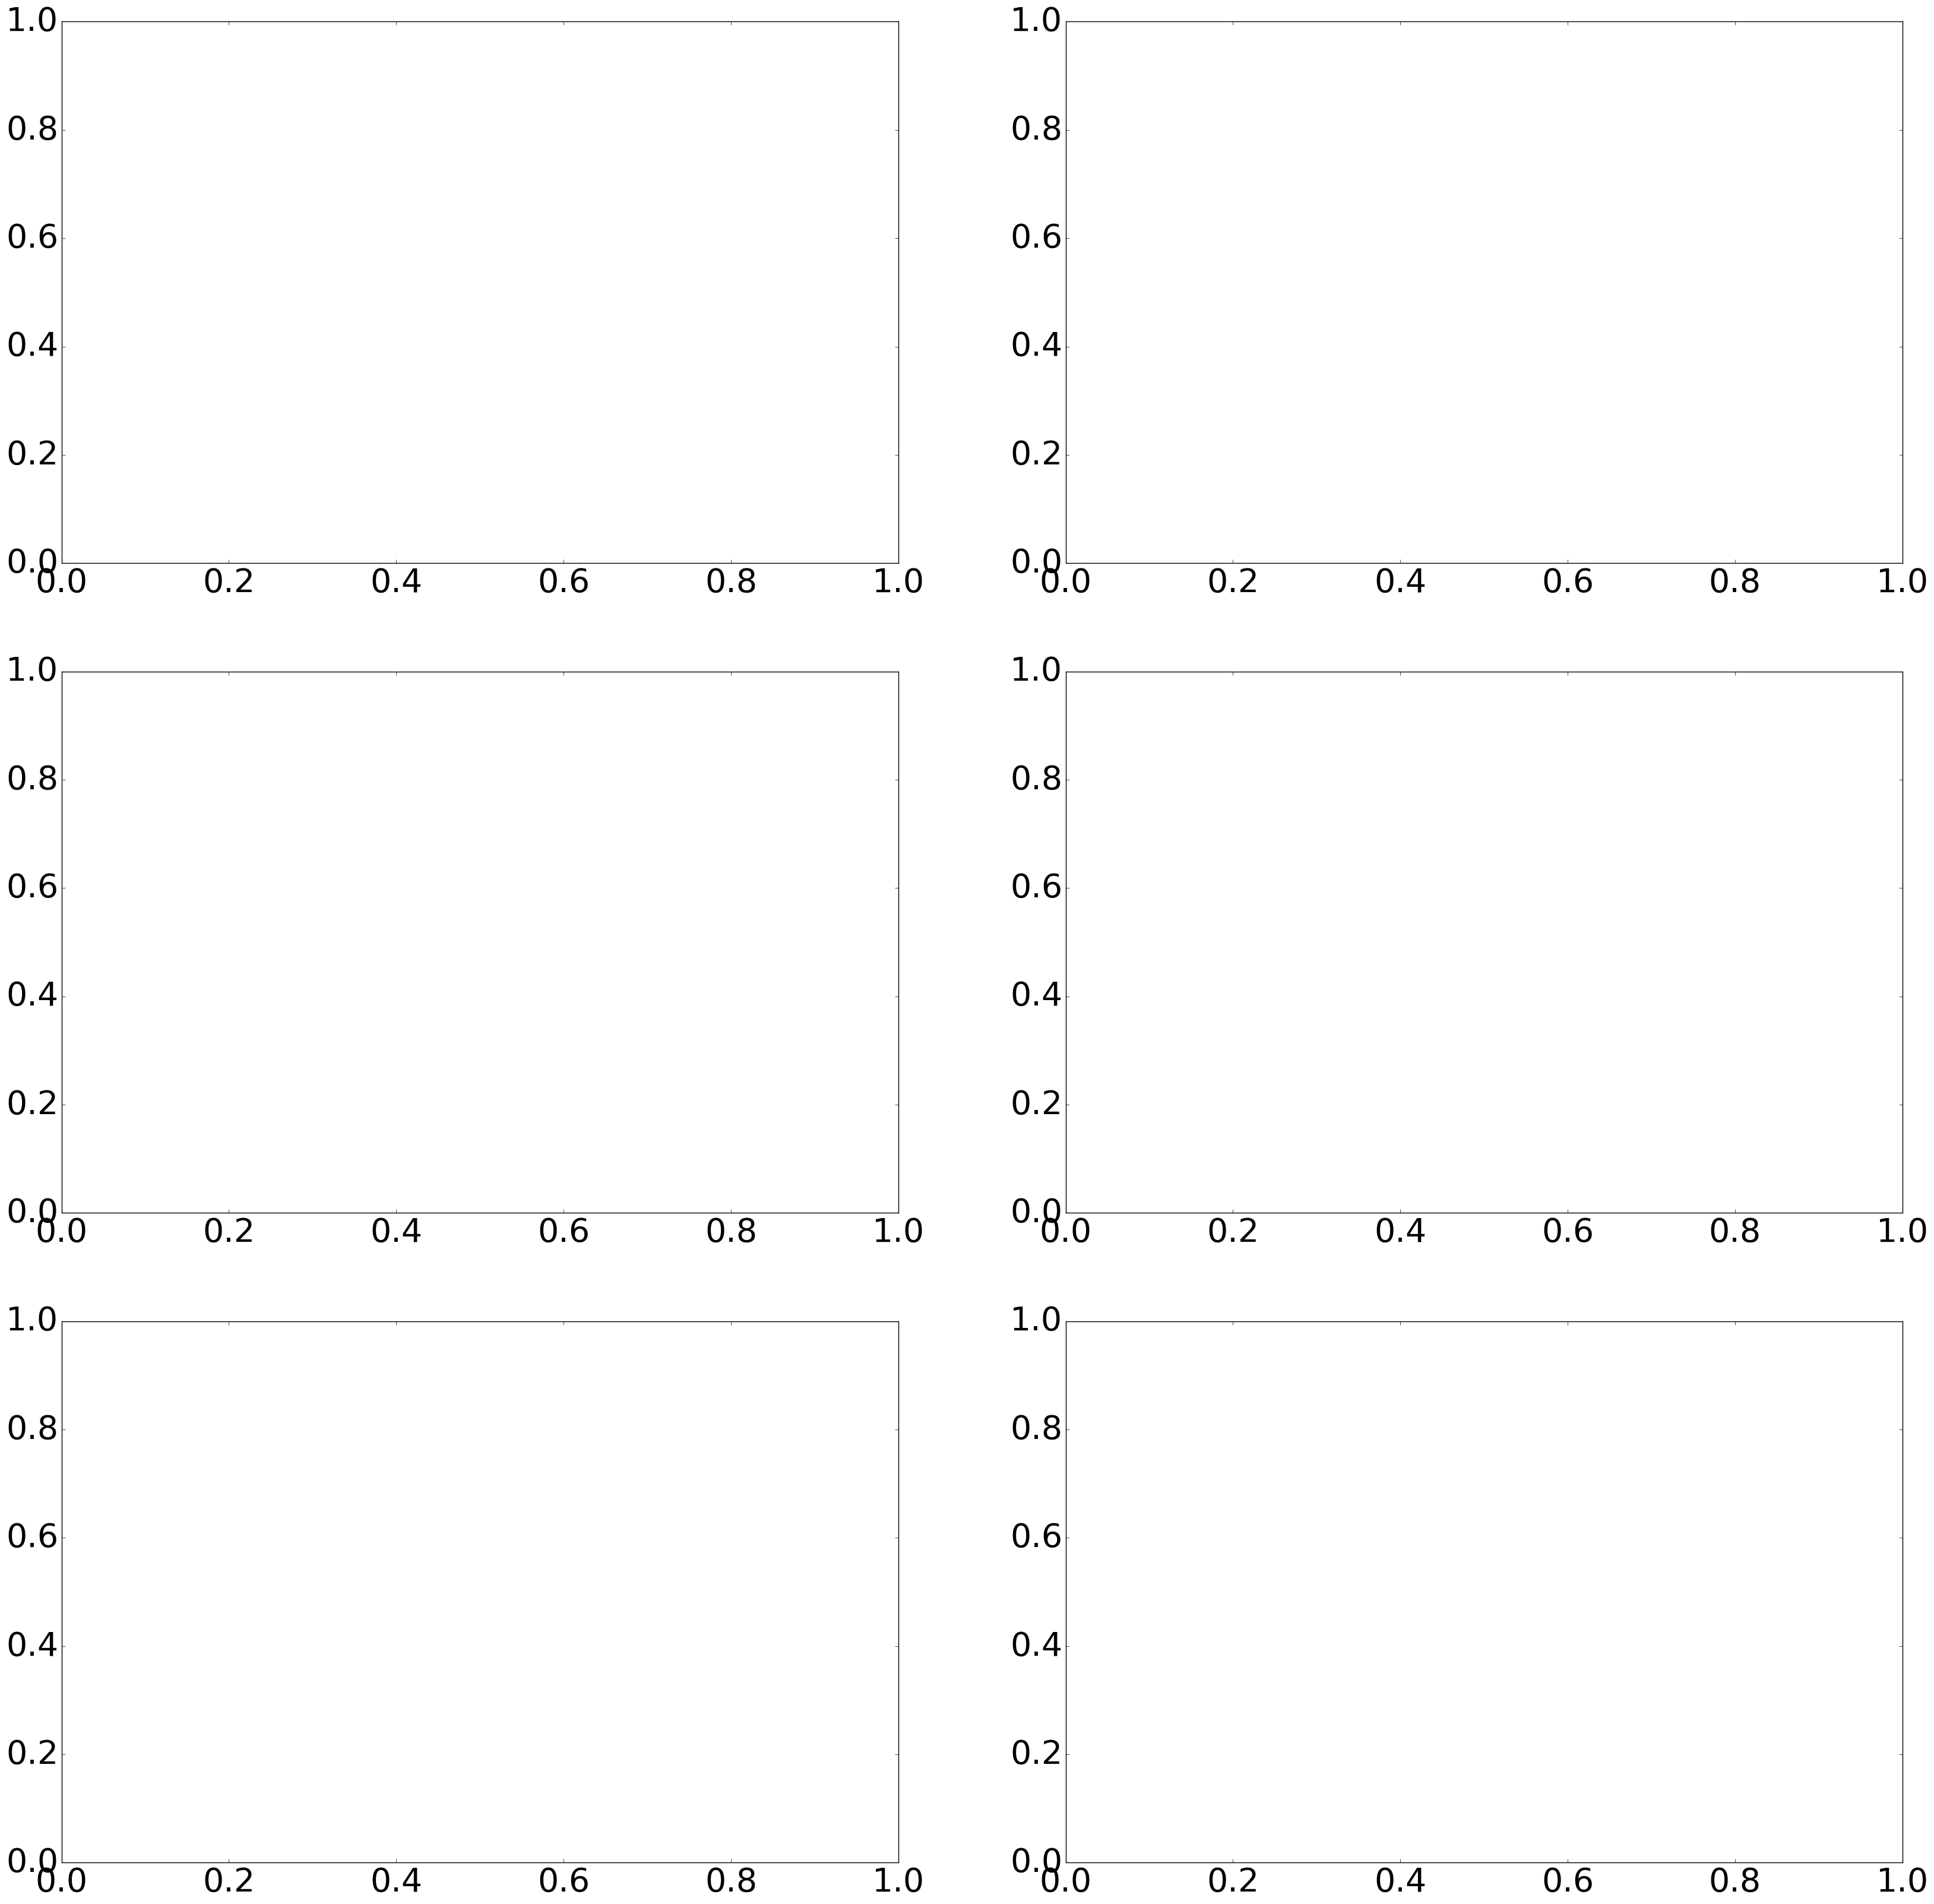

In [6]:
fig